In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #for visualization

# Read Data

In [2]:
insurance= pd.read_csv("Medical_insurance_dataset.csv")

insurance.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [3]:
insurance.shape

(400, 5)

# Data Processing

In [4]:
missing_data = insurance.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [5]:
#Dropping User ID column
insurance.drop(["User ID"], axis= "columns", inplace= True)

In [6]:
insurance.head(20)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
5,Male,27,58000,not-purchased
6,Female,27,84000,not-purchased
7,Female,32,150000,purchased
8,Male,25,33000,not-purchased
9,Female,35,65000,not-purchased


In [7]:
insurance.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased          object
dtype: object

In [8]:
#Mapping the values 1 and to transform the target column
insurance["Purchased"] = insurance["Purchased"].apply(lambda x: 1 if x == "purchased" else 0)

In [9]:
#Reading the data again
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


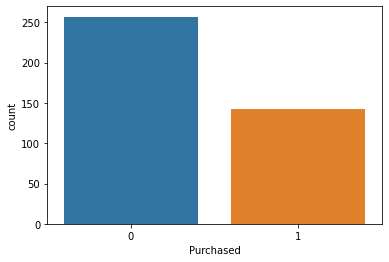

In [10]:
sns.countplot(x = "Purchased", data = insurance);

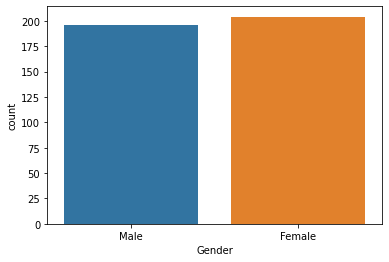

In [11]:
sns.countplot(x = "Gender", data = insurance);

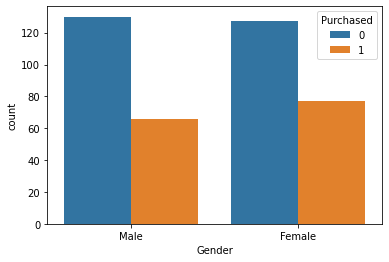

In [12]:
sns.countplot(x = "Gender" , hue = "Purchased", data = insurance);

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

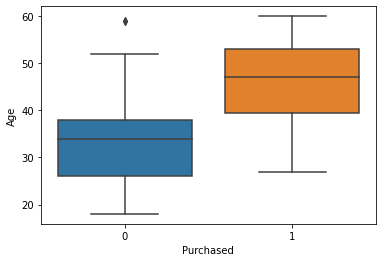

In [13]:
sns.boxplot(x = "Purchased", y = "Age", data = insurance)

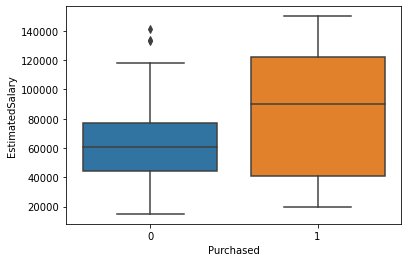

In [14]:
sns.boxplot(x = "Purchased", y = "EstimatedSalary", data = insurance);

In [15]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split 

In [16]:

X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data

y = insurance["Purchased"]

In [17]:
pd.get_dummies(insurance["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [18]:
X = pd.get_dummies(X)

In [19]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logisticmodel = LogisticRegression()

logisticmodel.fit(X_train, y_train) 

LogisticRegression()

In [23]:
logisticmodel.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
logistic_prediction = logisticmodel.predict(X_test)

In [25]:
def ConfusionMatrix(ytest, ypred, label = ["Negative", "Positive"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

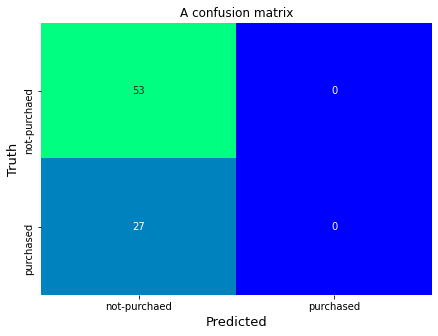

In [26]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [27]:
metrics.accuracy_score(y_test, logistic_prediction)

0.6625

In [28]:
metrics.f1_score(y_test, logistic_prediction)

0.0

# Naive Bayes Model

In [29]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()

naivemodel.fit(X_train, y_train)

GaussianNB()

In [30]:
naivemodel_prediction = naivemodel.predict(X_test)

In [31]:
naivemodel_prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

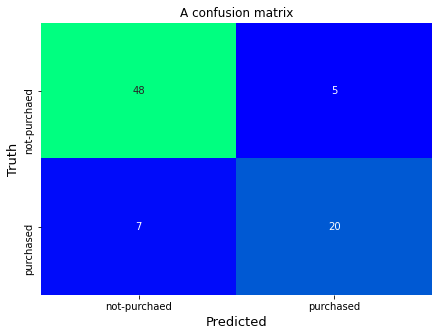

In [32]:
ConfusionMatrix(y_test, naivemodel_prediction, label= ["not-purchaed", "purchased"])

In [33]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.85

In [34]:
metrics.f1_score(y_test, naivemodel_prediction)

0.7692307692307692

# Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()

randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [37]:
randomforestmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

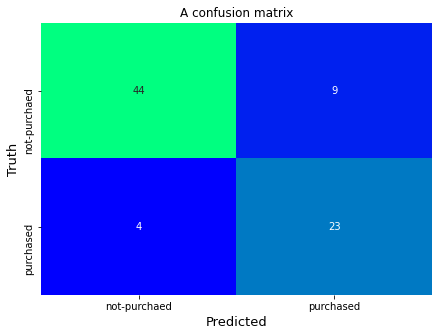

In [38]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ["not-purchaed", "purchased"])

In [39]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8375

In [40]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.7796610169491525

# XGBoost Model

In [41]:
from xgboost import XGBClassifier

xgboostmodel = XGBClassifier(use_label_encoder=False)

xgbboostmodel = xgboostmodel.fit(X_train, y_train)

[01:23:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
xgbboostmodel_prediction = xgboostmodel.predict(X_test)

In [44]:
xgbboostmodel_prediction

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

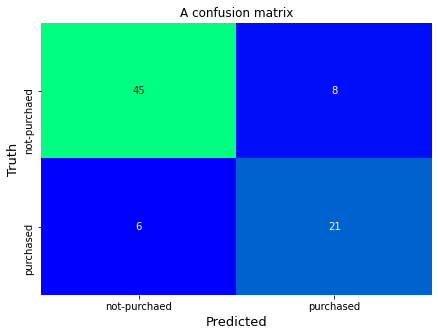

In [45]:
ConfusionMatrix(y_test, xgbboostmodel_prediction, label= ["not-purchaed", "purchased"])

In [46]:
metrics.accuracy_score(y_test, xgbboostmodel_prediction)

0.825

In [47]:
metrics.f1_score(y_test, xgbboostmodel_prediction)

0.75

# Support Vector Machine

In [48]:
from sklearn.svm import SVC

SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

SVC()

In [49]:
SVMmodel_prediction = SVMmodel.predict(X_test)

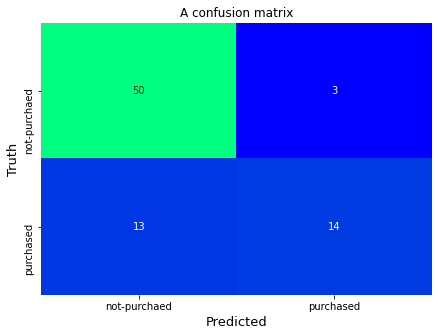

In [50]:
ConfusionMatrix(y_test, SVMmodel_prediction, label= ["not-purchaed", "purchased"])

In [51]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.8

In [52]:
metrics.f1_score(y_test, SVMmodel_prediction)

0.6363636363636364

# CLASS ACTIVITY

# KNearestNeighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

Knnmodel = KNeighborsClassifier()

Knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
Knnmodel_prediction = Knnmodel.predict(X_test)

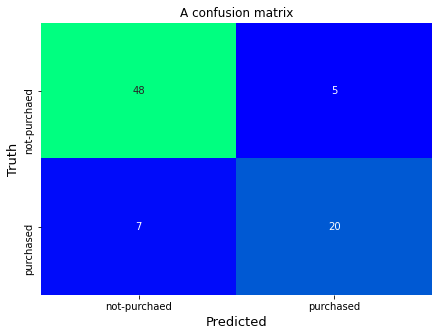

In [59]:
ConfusionMatrix(y_test, Knnmodel_prediction, label= ["not-purchaed", "purchased"])

In [60]:
metrics.accuracy_score(y_test, Knnmodel_prediction)

0.85

In [67]:
metrics.f1_score(y_test, Knnmodel_prediction)

0.7692307692307692

In [63]:
from sklearn.tree import DecisionTreeClassifier
decisiontreemodel = DecisionTreeClassifier()
decisiontreemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
decisiontreemodel_prediction = decisiontreemodel.predict(X_test)

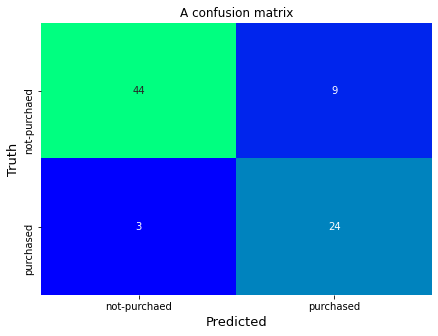

In [65]:
ConfusionMatrix(y_test, decisiontreemodel_prediction, label= ["not-purchaed", "purchased"])

In [68]:
metrics.accuracy_score(y_test, decisiontreemodel_prediction)

0.85

In [69]:
metrics.f1_score(y_test, decisiontreemodel_prediction)

0.7999999999999999

# Gradient Boosting


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, y_train)

GradientBoostingClassifier()

In [71]:
GBmodel_prediction = GBmodel.predict(X_test)

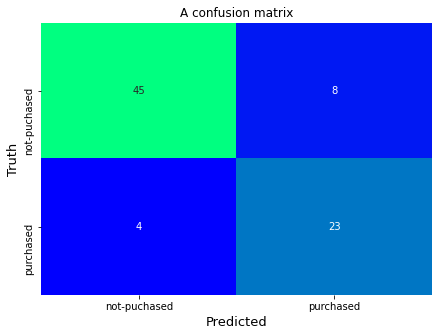

In [73]:
ConfusionMatrix(y_test, GBmodel_prediction, label= ["not-puchased", "purchased"])

In [76]:
metrics.accuracy_score(y_test, GBmodel_prediction)

0.85

In [77]:
metrics.f1_score(y_test, GBmodel_prediction)

0.7931034482758621

In [79]:
submission = pd.read_csv("........csv")
submission.Purchased = test_pred
submission.head()

FileNotFoundError: [Errno 2] No such file or directory: '........csv'

In [78]:
submission.to_csv("sub.csv", index=False)

NameError: name 'submission' is not defined